# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
%matplotlib inline

# Initialize the parameters

In [3]:
np.random.seed(204)   # Seed for random number generator
x = np.random.randint(2, size = 500)   # Binary information as stream of bits (binary signal 0 or 1)
n = len(x)          # Number of bits
Tb = 0.001;         # Data rate/bit period (second)
nb = 100;           # Number of samples per bit 
br = 1/Tb;          # Bit rate  (Hz)
f = 2*br            # Carrier frequency (Hz) (>= 2*br)

t = Tb*np.arange(0,n,1/nb)

# 1. PSK Modulation

## 1.1. Generate and plot the carrier signal

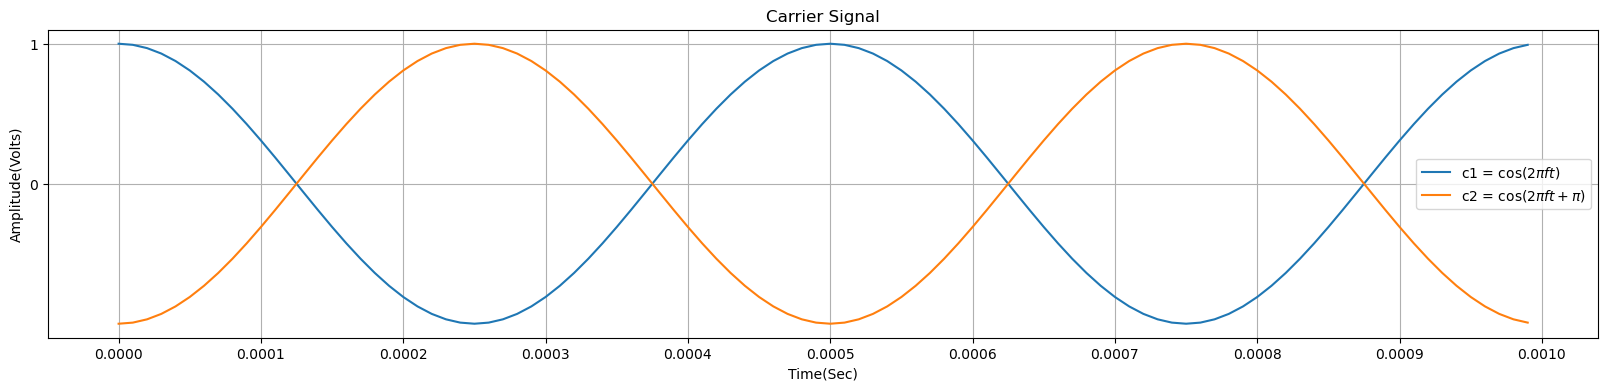

In [4]:
# define the carrier signal
c1 = np.cos(2*np.pi*f*t);             # carrier signal for binary value '0'
c2 = np.cos(2*np.pi*f*t + np.pi);     # carrier signal for binary value '1'

# plot the carrier signal for 1 bit period
plt.figure(figsize=(20,4))
t_  = Tb*np.arange(0,1,1/100)
plt.plot(t_,np.cos(2*np.pi*f*t_))
plt.plot(t_,np.cos(2*np.pi*f*t_ + np.pi))
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude(Volts)')
plt.xticks(np.arange(0,Tb+Tb/10,Tb/10))
plt.yticks([0,1])
plt.grid(True)
plt.title('Carrier Signal')
plt.legend(['c1 = $\cos(2\pi ft$)','c2 = $\cos(2\pi ft + \pi)$'])
plt.show()

## 1.2. Generate and plot the binary data sequence

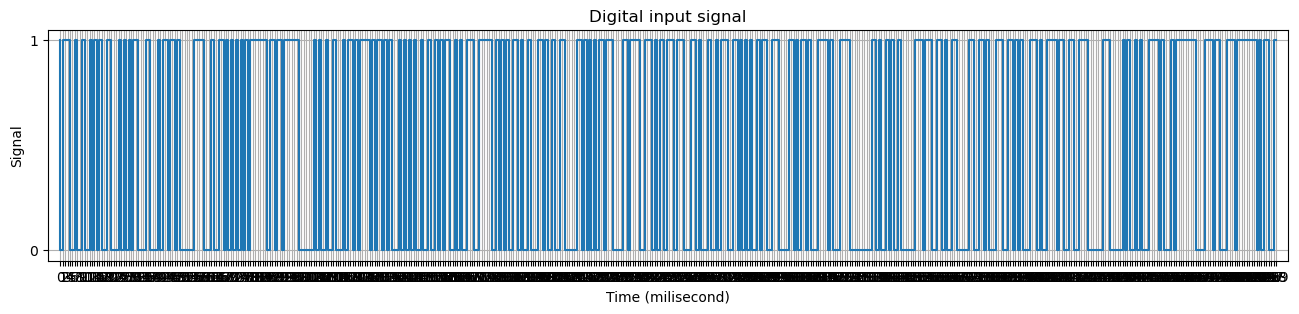

In [5]:
# generate the binary data sequence
digit = np.empty(shape=0, dtype=int); 
for i in range(0,n,1):
    if x[i] == 1:
        digit =np.append(digit,np.ones(nb))
    else:
        digit =np.append(digit,np.zeros(nb))

# plot the binary data signal
plt.figure(figsize = (16, 3))   
plt.title('Digital input signal')
plt.xticks(1000*np.arange(0,Tb*n,Tb))
plt.xlabel('Time (milisecond)')
plt.ylabel('Signal')
plt.yticks([0,1])
plt.step(1000*np.arange(0,Tb*n,Tb), x)
plt.grid(True)
plt.margins(x=0.01, y=0.05)
plt.show()

## 1.3. Perform PSK modulation and plot the PSK modulated signal

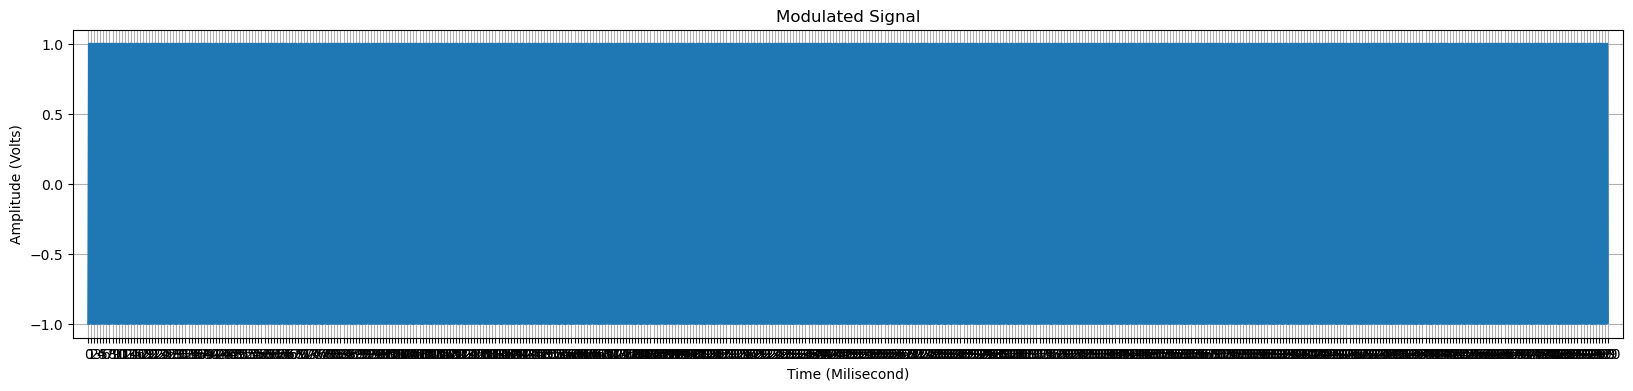

In [6]:
# perform PSK modulation
mod = np.where(digit==0, c1, digit*c2)

# plot the PSK modulated signal
plt.figure(figsize=(20,4))
plt.plot(1000*t,mod)
plt.xlabel('Time (Milisecond)')
plt.ylabel('Amplitude (Volts)')
plt.xticks(1000*np.arange(0,Tb*n+Tb,Tb))
plt.yticks(np.arange(-1,1.5,0.5))
plt.grid(True)
plt.title('Modulated Signal')
plt.margins(x=0.01, y=0.05)
plt.show()


# 2. PSK Demodulation

## Demodulated binary data

In [7]:
# function to demodulate the signal
def demodulate(mod):
    demod=np.empty(shape=n, dtype=int)
    for i in range(0, n*nb, nb):
        I1 = np.trapz(mod[i:i+nb]*c1[i:i+nb])
        e1 = np.sum(c1[i:i+nb]**2)
        I2 = np.trapz(mod[i:i+nb]*c2[i:i+nb])
        e2 = np.sum(c2[i:i+nb]**2)
        if I1 - 1/2*e1 > I2 - 1/2*e2:
            demod[np.floor(i/nb).astype('int')] = 0
        else:
            demod[np.floor(i/nb).astype('int')] = 1
    return demod

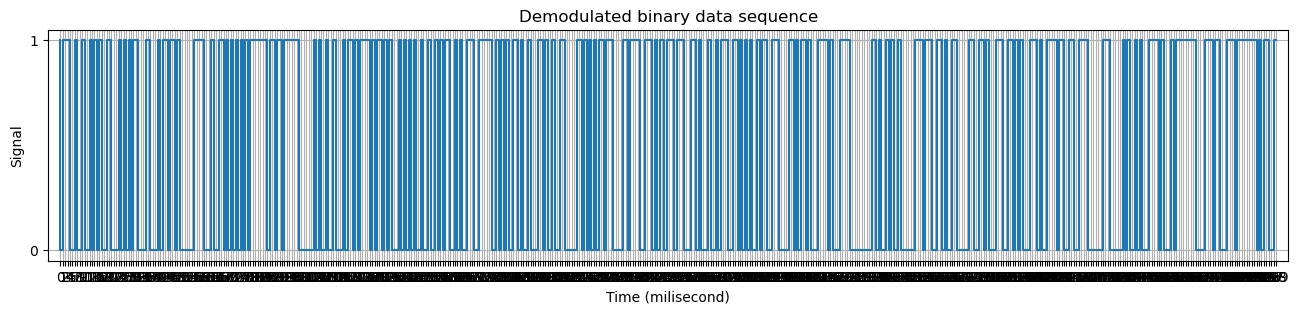

In [8]:
# demodulate the signal
demod = demodulate(mod)

# plot the demodulated binary data sequence
plt.figure(figsize = (16, 3))   
plt.title('Demodulated binary data sequence')
plt.xticks(1000*np.arange(0,Tb*n,Tb))
plt.xlabel('Time (milisecond)')
plt.ylabel('Signal')
plt.yticks([0,1])
plt.step(1000*np.arange(0,Tb*n,Tb), demod)
plt.margins(x=0.01, y=0.05)
plt.grid(True)

# 3. PSK modulation/demodulation under the effects of Gaussian noise

## 3.1. PSK Modulation with AWGN

In [9]:
def add_awgn(mod, std):
    noise = np.random.normal(0, std, len(mod))
    return mod + noise

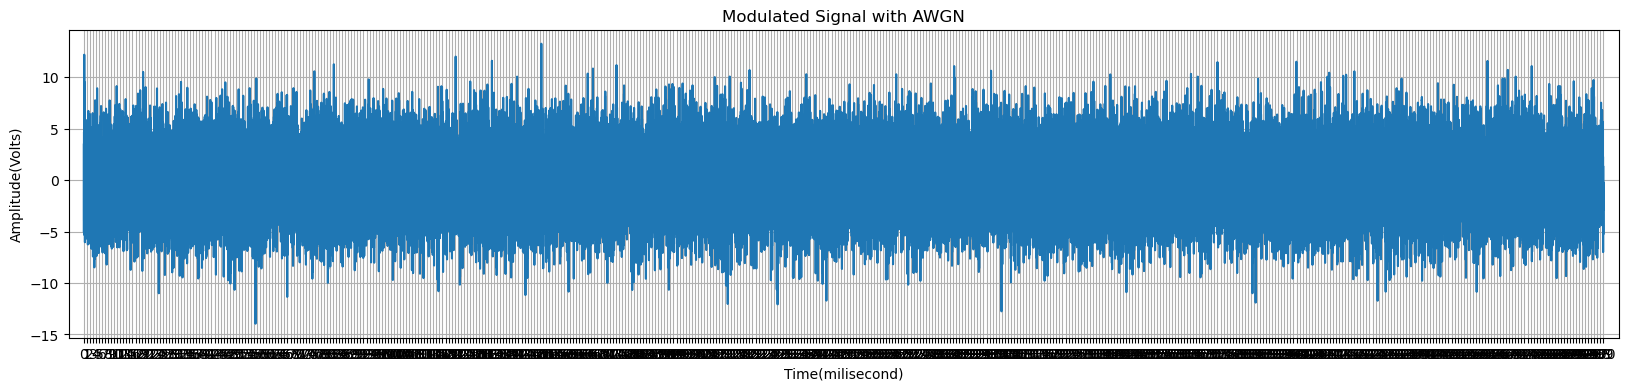

In [10]:
# add Gaussian noise with zero mean and variance N0/2 to the transmitted waveform
N0 = 18
standard_deviation = np.sqrt(N0/2)
mod_noise = add_awgn(mod, standard_deviation)

# plot the modulated signal with AWGN
plt.figure(figsize=(20,4))
plt.plot(1000*t,mod_noise)
plt.xlabel('Time(milisecond)')
plt.ylabel('Amplitude(Volts)')
plt.xticks(1000*np.arange(0,Tb*n+Tb,Tb))
plt.grid(True)
plt.title('Modulated Signal with AWGN')
plt.margins(x=0.01, y=0.05)
plt.show()

## 3.2. PSK Demodulation with AWGN

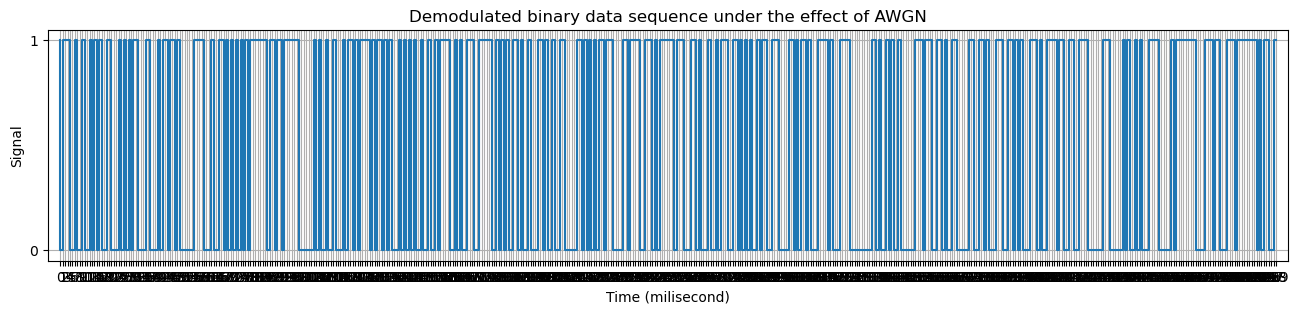

In [11]:
# demodulate the signal with AWGN
demod_noise = demodulate(mod_noise)

# plot the demodulated binary data sequence under the effect of AWGN
plt.figure(figsize = (16, 3))   
plt.title('Demodulated binary data sequence under the effect of AWGN')
plt.xticks(1000*np.arange(0,Tb*n,Tb))
plt.xlabel('Time (milisecond)')
plt.ylabel('Signal')
plt.yticks([0,1])
plt.step(1000*np.arange(0,Tb*n,Tb), demod_noise)
plt.grid(True)
plt.margins(x=0.01, y=0.05)
plt.show()

## 3.3. BER simulation for N0 = 18
For BPSK , one symbol (carrier phase) represents one bit and hence symbol rate equals bit rate.

In [12]:
Pb = np.count_nonzero(demod_noise - x) / len(x)
print(f"Bit Error Rate: {Pb*100}%")

Bit Error Rate: 0.6%


# 4. Derive the bit error probability according to the theory

## 4.1 Generate BER simulation for 2-PSK

In [13]:
E1 = np.trapz((c1**2)[0:nb])    # energy per bit for binary value '0'
E2 = np.trapz((c2**2)[0:nb])    # energy per bit for binary value '1'
Eb = 1/2 * (E1 + E2)            # energy per bit

snr_db = np.linspace(-20,7,100)
ber = np.zeros_like(snr_db).astype('float')
sigma = np.zeros_like(snr_db).astype('float')
for i in range(len(snr_db)):
    sigma[i] = np.sqrt(1/2 * Eb / (10**(snr_db[i]/10)))
    mod_noise = add_awgn(mod, sigma[i])
    demod_noise = demodulate(mod_noise)
    ber[i] = np.count_nonzero(demod_noise - x) / len(x)

## 4.2 Plot the BER simulation and BER theory for 2-PSK

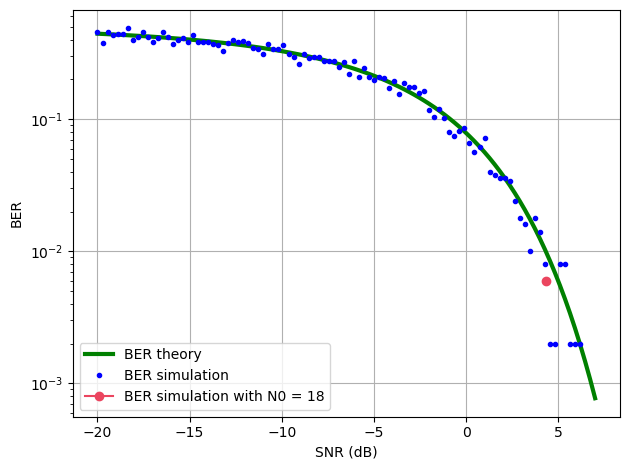

In [20]:
ber_theory = 1/2 * erfc(np.sqrt(10**(snr_db/10)))
plt.semilogy(snr_db, ber_theory, 'g-', linewidth = 3)   # plot the theoretical BER
plt.semilogy(snr_db, ber, 'b.')                # plot the BER simulation results 
plt.plot(10*np.log10(Eb/N0), Pb, color = '#EB455F', marker = 'o') # plot the BER simulation results for AWGN with N0=8
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.grid(True)
plt.tight_layout()
plt.legend(['BER theory', 'BER simulation', 'BER simulation with N0 = 18'])
plt.show()

In [15]:
Pb

0.006